**Mounting colab notebook to Drive**

In [1]:
# Mounting colab notebook to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# AI-Feynman

*Installing AI-Feynman and relevant packages*

In [ ]:
# Installing AI Feynman 2.0, c shell, and relevant packages
## https://ai-feynman.readthedocs.io/en/latest/
!pip install aifeynman

     |████████████████████████████████| 219 kB 4.3 MB/s 
  Created wheel for aifeynman: filename=aifeynman-2.0.7-cp37-cp37m-linux_x86_64.whl size=863134 sha256=24ddf14c3b3fe887ecc4d042c2c3819937510e9e587565bf8e2ae0387c85b800
  Stored in directory: /root/.cache/pip/wheels/c3/51/dc/f385966c690f4ae7b645205b5effcb67fd6eccef022053b0fe
Successfully built aifeynman


In [ ]:
# Checking OS version, fortran compiler version, and granting relevant permissions (github only)
!sudo apt-get install csh
!lsb_release -a 
!gfortran --version
!chmod +777 '/content/drive/My Drive/Colab Notebooks/Feynman Local/'*

In [2]:
# Importing relevant modules
import os
import random
import numpy as np
import matplotlib as plt
import pandas as pd
# import aifeynman
# from aifeynman import S_brute_force, S_run_aifeynman

# Configuring matplotlib preferences
%matplotlib inline
plt.style.use('seaborn-whitegrid')

*Verifying working directory*

In [ ]:
input_path = '/content/drive/My Drive/Colab Notebooks/Feynman Local/'
os.chdir(input_path)
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Feynman Local


*Function Deposit (run once)*

In [ ]:
# Function to generate Y-values for x_1, x_23
def getY(x_1,x_23):
  y = -0.5*x_1 + 0.5*x_23 + 3
  
  return y

# Function to generate noisy rows of data (WITH x-values included) for x_1, x_23 and irrelevant x-values
def getNoisyRow():
  x = [random.random() for x in range(4)]
  x[1] = x[0]
  x[3] = x[2]
  y = getY(x[1],x[3])
  mu = 0
  sigma = 0.05
  noise = np.random.normal(mu, sigma, 4)
  x = x+noise
  return str(x[0])+" "+str(x[1])+" "+str(x[2])+" "+str(x[3])+" "+str(y)+"\n"

*Perfect data - generation, plotting, brute force test, symbolic regression*

In [ ]:
# Generating perfect data (in a format readable by symbolic regression function)

x_1 = np.random.rand(10000)
x_23 = np.random.rand(10000)

#print(x_1)

y = getY(x_1,x_23)
#print(y.shape)

data = np.stack([x_1,x_23,y]).transpose()
print(data.shape)

# Saving data as a .txt file in working directory for use by symbolic regression function
np.save(input_path + 'feynman_data.npy',data)
np.savetxt(input_path + 'feynman_data.txt',data,delimiter=' ')

(10000, 3)


             0         1         2
0     0.107754  0.649893  3.271069
1     0.140803  0.096550  2.977873
2     0.203035  0.072329  2.934647
3     0.228241  0.357869  3.064814
4     0.204372  0.213296  3.004462
...        ...       ...       ...
9995  0.540079  0.695792  3.077856
9996  0.650320  0.305726  2.827703
9997  0.510743  0.981019  3.235138
9998  0.061877  0.473488  3.205806
9999  0.512392  0.560850  3.024229

[10000 rows x 3 columns]


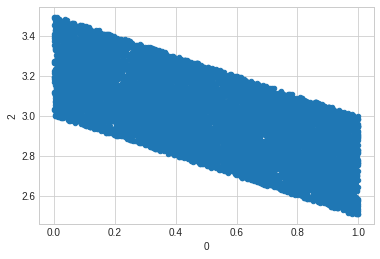

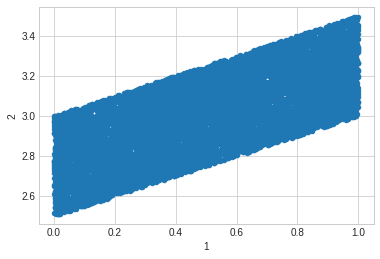

In [ ]:
# Printing out generated data with Pandas and plotting it with matplotlib
df=pd.read_csv(input_path + 'feynman_data.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)

In [ ]:
#Running brute force test on perfect data
!pwd
S_brute_force.brute_force(input_path,"feynman_data.txt",30,"14ops.txt")

# Printing out a few lines of data (purely for reference)
!head -n 1 '/content/drive/My Drive/Colab Notebooks/Feynman Local/feynman_data.txt'   

/content/drive/My Drive/Colab Notebooks/Feynman Local
Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/Colab Notebooks/Feynman Local/feynman_data.txt
1.077542781817661943e-01 6.498927254788310348e-01 3.271069223648532365e+00


In [ ]:
# Running symbolic regression function on generated dataset
S_run_aifeynman.run_aifeynman(input_path,"feynman_data.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=600)

# Viewing processed data
!ls -1 '/content/drive/My Drive/Colab Notebooks/Feynman Local/results'
!cat '/content/drive/My Drive/Colab Notebooks/Feynman Local/solution_feynman_data.txt'

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/Colab Notebooks/Feynman Local/feynman_data.txt_train
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/Colab Notebooks/Feynman Local/feynman_data.txt_train
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
29.0 0.0 3.000000000000+log(sqrt(exp((x1-x0))))

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_squared/feynman_data.txt_train
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_squared/feynman_data.txt_train
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
29.0 0.0 3.000000000000+log(sqrt(exp((x1-x0))))

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to s

*Introducing noise (and unwanted variables) into the data - generation, plotting, brute force test, symbolic regression*

In [ ]:
# Generating NOISY data in a format readable by symbolic regression function
os.chdir(input_path)
print(os.getcwd())

with open("noisydata.txt", "w") as f:
  for _ in range(10000):
    f.write(getNoisyRow())
f.close()

!head -n 20 '/content/drive/My Drive/Colab Notebooks/Feynman Local/noisydata.txt'

In [ ]:
# Printing out generated noisy data with Pandas and plotting it with matplotlib

!head -10 '/content/drive/My Drive/Colab Notebooks/Feynman Local/noisydata.txt'
df=pd.read_csv(input_path + 'noisydata.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=2, y=4)

In [ ]:
#Running brute force test on the noisy data 
S_brute_force.brute_force(input_path,"noisydata.txt",30,"14ops.txt")

# Printing out a few lines of the noisy data (purely for reference)
!head -n 5 '/content/drive/My Drive/Colab Notebooks/Feynman Local/noisydata.txt'    

In [ ]:
# Running symbolic regression function on the noisy data
S_run_aifeynman.run_aifeynman(input_path,"noisydata.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=600)

# Viewing processed data
!ls -1 '/content/drive/My Drive/Colab Notebooks/Feynman Local/results/'
!cat '/content/drive/My Drive/Colab Notebooks/Feynman Local/results/solution_noisydata.txt'

# PySR

**Julia installation (run once)**

In [ ]:
# Julia installation
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-12-03 04:16:10 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


*Installing PySR and relevant packages*

In [ ]:
# Installing PySR (and relevant packages)
!pip install pysr

*Importing relevant modules*

In [ ]:
#Importing relevant modules
import os
import matplotlib as plt
import pandas as pd
import numpy as np
from pysr import pysr, best

*Verifying working directory*

In [ ]:
input_path = '/content/drive/My Drive/Colab Notebooks/Feynman Local/'
os.chdir(input_path)
!pwd

*Function Deposit (run once)*

In [ ]:
# Function deposit
def get_y_values(x_values):
  y_values = -0.5 * x_values[:, 0] + 0.5 * x_values[:, 1] + 3
  return y_values

def get_noisy_y_values(x_values):
  noisy_y_values = -0.5 * x_values[:, 0] + 0.5 * x_values[:, 2] + 3
  return noisy_y_values

*Perfect data - generation, plotting, symbolic regression*

In [ ]:
#Generating data sets compatible with PySR

x_values = np.random.randn(10000, 2)

y_values = get_y_values(x_values)

np.save('x_values_pysr.npy',x_values)
np.savetxt('x_values_pysr.txt',x_values,delimiter=' ')

np.save('y_values_pysr.npy',y_values)
np.savetxt('y_values_pysr.txt',y_values,delimiter=' ')

# Converting data into a .txt format compatible with matplotlib (for plotting step)
with open('xy_data_pysr.txt', 'w') as f:
  for r in range(10000):
    f.write(f'{x_values[:, 0][r]} {x_values[:, 1][r]} {y_values[r]}\n')

             0         1         2
0    -0.681548 -0.176260  3.252644
1     1.805862  2.098558  3.146348
2    -0.189162  0.316264  3.252713
3    -1.095724 -1.257038  2.919343
4     1.300571  1.159568  2.929498
...        ...       ...       ...
9995  0.020833 -1.031064  2.474051
9996 -0.766998 -0.586787  3.090106
9997 -0.830995  0.300860  3.565927
9998 -0.242816 -1.968588  2.137114
9999 -0.915987 -2.018392  2.448798

[10000 rows x 3 columns]


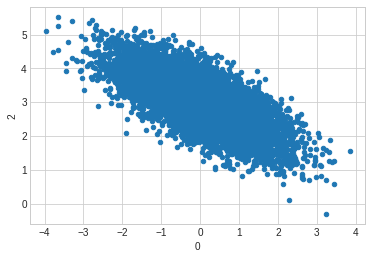

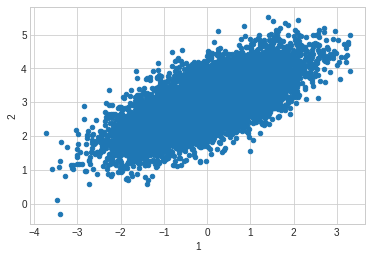

In [ ]:
# Printing perfect data with Pandas and plotting it with matplotlib
plt.style.use('seaborn-whitegrid')
df=pd.read_csv(input_path + 'xy_data_pysr.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)

In [ ]:
# Running PySR symbolic regression on perfect data

equations = pysr(
    x_values,
    y_values,
    niterations=5,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=[
        "sign",
        "neg",
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

...# (you can use ctl-c to exit early)

print(best(equations))

Running on julia -O3 --threads 4 /tmp/tmppin21ss4/runfile.jl
Started!

Cycles per second: 9.440e+01
Head worker occupation: 2.0%
Progress: 1 / 100 total iterations (1.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           4.984e-01  -0.000e+00  2.99966


Cycles per second: 3.830e+02
Head worker occupation: 1.7%
Progress: 2 / 100 total iterations (2.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           4.984e-01  -0.000e+00  2.99966


Cycles per second: 5.740e+02
Head worker occupation: 1.6%
Progress: 3 / 100 total iterations (3.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           4.984e-01  -0.000e+00  2.99966


Cycles per second: 5.310e+02
Head worker occupation: 1.1%
Progress: 6 / 100 total iterations (6.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equ

*Introducing noise (and unwanted variables) into the data - generation, plotting, symbolic regression*

In [ ]:
#Generating noisy data sets compatible with PySR

x_values = np.random.randn(10000, 4)

noisy_y_values = get_noisy_y_values(x_values)

mu = 0
sigma = 0.05
noise = np.random.normal(mu, sigma, 4)
noisy_x_values = x_values + noise

np.save('noisy_x_values_pysr.npy',noisy_x_values)
np.savetxt('noisy_x_values_pysr.txt',noisy_x_values,delimiter=' ')

np.save('noisy_y_values_pysr.npy',noisy_y_values)
np.savetxt('noisy_y_values_pysr.txt',noisy_y_values,delimiter=' ')

# Converting data into a .txt format compatible with matplotlib (for plotting step)
with open('xy_noisy_data_pysr.txt', 'w') as f:
  for r in range(10000):
    f.write(f'{x_values[:, 0][r]} {x_values[:, 2][r]} {y_values[r]}\n')

In [ ]:
# Printing perfect data with Pandas and plotting it with matplotlib
plt.style.use('seaborn-whitegrid')
df=pd.read_csv(input_path + 'xy_noisy_data_pysr.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)

In [ ]:
# Running PySR symbolic regression on the noisy data
equations = pysr(
    noisy_x_values,
    normal_y_values,
    niterations=5,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=[
        "sign",
        "neg",
        "cos",
        "exp",
        "sin",  # Pre-defined library of operators (see docs)
        "inv(x) = 1/x",  # Define your own operator! (Julia syntax)
    ],
)

...# (you can use ctl-c to exit early)

print(best(equations))

# gplearn

*Downloading gplearn and relevant packages*

In [ ]:
# Installing gplearn
# https://gplearn.readthedocs.io/en/stable/installation.html
!pip install gplearn

     |████████████████████████████████| 41 kB 271 kB/s 


*Importing relevant modules/functions*

In [ ]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
import matplotlib as plt
import numpy as np
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


*Verify working directory*

In [ ]:
input_path = '/content/drive/My Drive/Colab Notebooks/Feynman Local/'
os.chdir(input_path)
!pwd

*Function Deposit*

In [ ]:
# Function deposit
def get_y_values(x_values):
  y_values = -0.5 * x_values[:, 0] + 0.5 * x_values[:, 1] + 3
  return y_values

def get_noisy_y_values(x_values):
  noisy_y_values = -0.5 * x_values[:, 0] + 0.5 * x_values[:, 2] + 3
  return noisy_y_values

Perfect data - generation, plotting, symbolic regression

In [ ]:
#Generating data sets compatible with gplearn

x_values = np.random.randn(10000, 2)

y_values = get_y_values(x_values)

np.save('x_values_gplearn.npy',x_values)
np.savetxt('x_values_gplearn.txt',x_values,delimiter=' ')

np.save('y_values_gplearn.npy',y_values)
np.savetxt('y_values_gplearn.txt',y_values,delimiter=' ')

# Converting data into a .txt format compatible with matplotlib (for plotting step)
with open('xy_data_gplearn.txt', 'w') as f:
  for r in range(10000):
    f.write(f'{x_values[:, 0][r]} {x_values[:, 1][r]} {y_values[r]}\n')

In [ ]:
# Printing perfect data with Pandas and plotting it with matplotlib
plt.style.use('seaborn-whitegrid')
df=pd.read_csv(input_path + 'xy_data_gplearn.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)

In [ ]:
# Running gplearn symbolic regression on perfect data (default settings)
est_gp = SymbolicRegressor()
est_gp.fit(x_values, y_values)
print(est_gp._program)

# Default configurations used, hence kwargs are not shown.
# The smaller the dataset, population_size can be increased. If the known target equation is (relatively) simple, parsimony_coefficient can be increased.
# https://github.com/trevorstephens/gplearn/blob/master/gplearn/genetic.py

*Introducing noise (and unwanted variables) into the data - generation, plotting, symbolic regression*

In [ ]:
#Generating noisy data sets compatible with gplearn

x_values = np.random.randn(10000, 4)

noisy_y_values = get_noisy_y_values(x_values)

mu = 0
sigma = 0.05
noise = np.random.normal(mu, sigma, 4)
noisy_x_values = x_values + noise

np.save('noisy_x_values_gplearn.npy',noisy_x_values)
np.savetxt('noisy_x_values_gplearn.txt',noisy_x_values,delimiter=' ')

np.save('noisy_y_values_gplearn.npy',noisy_y_values)
np.savetxt('noisy_y_values_gplearn.txt',noisy_y_values,delimiter=' ')

# Converting data into a .txt format compatible with matplotlib (for plotting step)
with open('xy_noisy_data_gplearn.txt', 'w') as f:
  for r in range(10000):
    f.write(f'{x_values[:, 0][r]} {x_values[:, 2][r]} {y_values[r]}\n')

In [ ]:
# Printing noisy data with Pandas and plotting it with matplotlib
plt.style.use('seaborn-whitegrid')
df=pd.read_csv(input_path + 'xy_data_gplearn.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)

In [ ]:
# Running gplearn symbolic regression on perfect data (default settings)
est_gp = SymbolicRegressor()
est_gp.fit(noisy_x_values, noisy_y_values)
print(est_gp._program)

# Default configurations used, hence kwargs are not shown.
# The smaller the dataset, population_size can be increased. If the known target equation is (relatively) simple, parsimony_coefficient can be increased.
# https://github.com/trevorstephens/gplearn/blob/master/gplearn/genetic.py